In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [ ]:
tweets_df = pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df = tweets_df.dropna()
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en movistar netflix disney ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,estrenos mensuales movistar netflix disney pri...,estren mensual movist netflix disney prim vide...
1,movistar albert alfred y la magia echa ser...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.4215,Positivo,movistar albert alfredo magia echa serie music...,movist albert alfred magi echa seri music lite...
2,movistar tratar a todos los equipos de futbol ...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019,Positivo,movistar tratar equipos futbol retransmisiones...,movist trat equip futbol retransmision movist ...
3,movistar bajada de precio de la fibra mejorar ...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.5574,Positivo,movistar bajada precio fibra mejorar calidad s...,movist baj preci fibr mejor calid son imag can...
4,postes de telefonica cortando la dpa la altura...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.1280,Negativo,postes telefonica cortando dia altura amen are...,post telefon cort dia altur amen ares coron mo...
...,...,...,...,...,...,...,...,...,...,...
159851,jazztel los clientes ya sabemos eso los que no...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.4756,Positivo,jazztel clientes sabemos saben cumplen contrat...,jazztel client sab sab cumpl contrat jazztel j...
159852,jazztel lo que me gustaria saber es por que ll...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.8271,Positivo,jazztel gustaria saber llevo semana contratand...,jazztel gustari sab llev seman contrat servici...
159853,jazztel deberias cambiar esa bandera absurda o...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,jazztel deberias cambiar bandera absurda ahora...,jazztel deberi cambi bander absurd ahor jazzte...
159854,jazztel ya me falta poco y cambio de empresa ...,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.5093,Positivo,jazztel falta cambio empresa suerte,jazztel falt cambi empres suert


## Identificación de Compañías


In [ ]:
# Función para verificar si una compania está en el texto
def contiene_compania(texto):
    texto = texto.lower()
    texto = re.sub("mas movil",'masmovil',texto)
    texto = re.sub("más movil",'masmovil',texto)
    texto = re.sub("más móvil",'masmovil',texto)
    texto = re.sub("mas móvil",'masmovil',texto)
    texto = re.sub("telefonica",'movistar',texto)
    texto = re.sub("telefónica",'movistar',texto) 
    lista_companias = ["movistar", "vodafone", "orange","yoigo","masmovil","jazztel"]
    for compania in lista_companias:
        if compania in texto:
            return compania
    return None

In [ ]:
tweets_df["Compania"] = tweets_df["text"].apply(contiene_compania)
tweets_df.head()

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras,Compania
0,estrenos mensuales en movistar netflix disney ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,estrenos mensuales movistar netflix disney pri...,estren mensual movist netflix disney prim vide...,movistar
1,movistar albert alfred y la magia echa ser...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.4215,Positivo,movistar albert alfredo magia echa serie music...,movist albert alfred magi echa seri music lite...,movistar
2,movistar tratar a todos los equipos de futbol ...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019,Positivo,movistar tratar equipos futbol retransmisiones...,movist trat equip futbol retransmision movist ...,movistar
3,movistar bajada de precio de la fibra mejorar ...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.5574,Positivo,movistar bajada precio fibra mejorar calidad s...,movist baj preci fibr mejor calid son imag can...,movistar
4,postes de telefonica cortando la dpa la altura...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.1280,Negativo,postes telefonica cortando dia altura amen are...,post telefon cort dia altur amen ares coron mo...,movistar


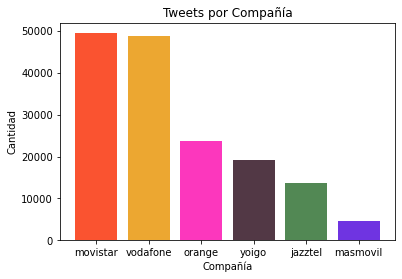

In [ ]:
conteo_companias = tweets_df["Compania"].value_counts()

# Generar colores aleatorios
colores = np.random.rand(len(conteo_companias), 3).round(3)

# Crear el gráfico de barras con colores aleatorios
plt.bar(conteo_companias.index, conteo_companias.values, color=colores)

# Configurar el título y los nombres de los ejes
plt.title("Tweets por Compañía")
plt.xlabel("Compañía")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

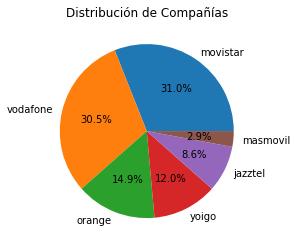

In [ ]:
plt.pie(conteo_companias.values, labels=conteo_companias.index, autopct='%1.1f%%')

# Configurar el título
plt.title("Distribución de Compañías")

# Mostrar el gráfico
plt.show()

# Wordcloud

In [ ]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#!pip install multidict

In [ ]:
text = " ".join(tweet for tweet in tweets_df["Texto Preprocesado"])

In [ ]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("url|vodafone|movistar|yoigo|jazztel|masmovil|orange", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [ ]:
def makeImage(text):
    
    wc = WordCloud(collocations=False, background_color= 'white')
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
dictio = getFrequencyDictForText(text)

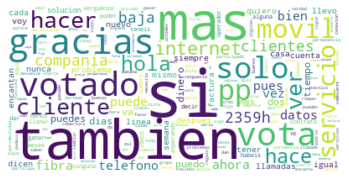

In [ ]:
makeImage(dictio)

In [ ]:
from collections import Counter

topDictio = dict(Counter(dictio).most_common(10))

In [ ]:
topDictio

{'si': 23639,
 'tambien': 16127,
 'mas': 14824,
 'gracias': 14097,
 'vota': 12843,
 'votado': 12805,
 'solo': 10028,
 'pp': 9156,
 'movil': 7690,
 'servicio': 6750}

# Bubblechart

In [ ]:
# Class available from https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html
import numpy as np

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):

        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [ ]:
data = {
    'bigrams': list(topDictio.keys()),

    'frequency': list(topDictio.values()),

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green']
}

In [ ]:
bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

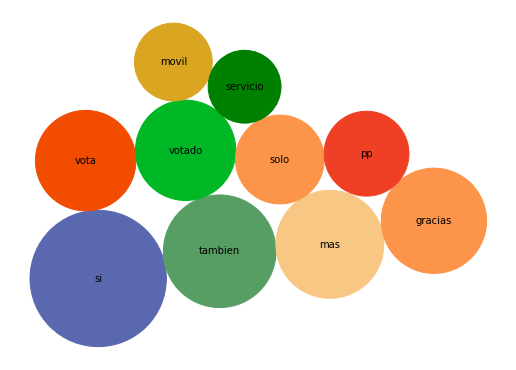

In [ ]:
# Display the image
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
# plt.savefig('bubble_chart_small.png',dpi=1500, bbox_inches='tight')
plt.show()